In [71]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
df = pd.read_csv('parkinsons.csv', delimiter=',')

In [17]:
df.shape

(195, 24)

In [24]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [15]:
type(df)

pandas.core.frame.DataFrame

In [25]:
colnames = df.columns
print(colnames)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [22]:
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [23]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [27]:
print(df.describe())
print('*'*60)
print(df.info())


       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


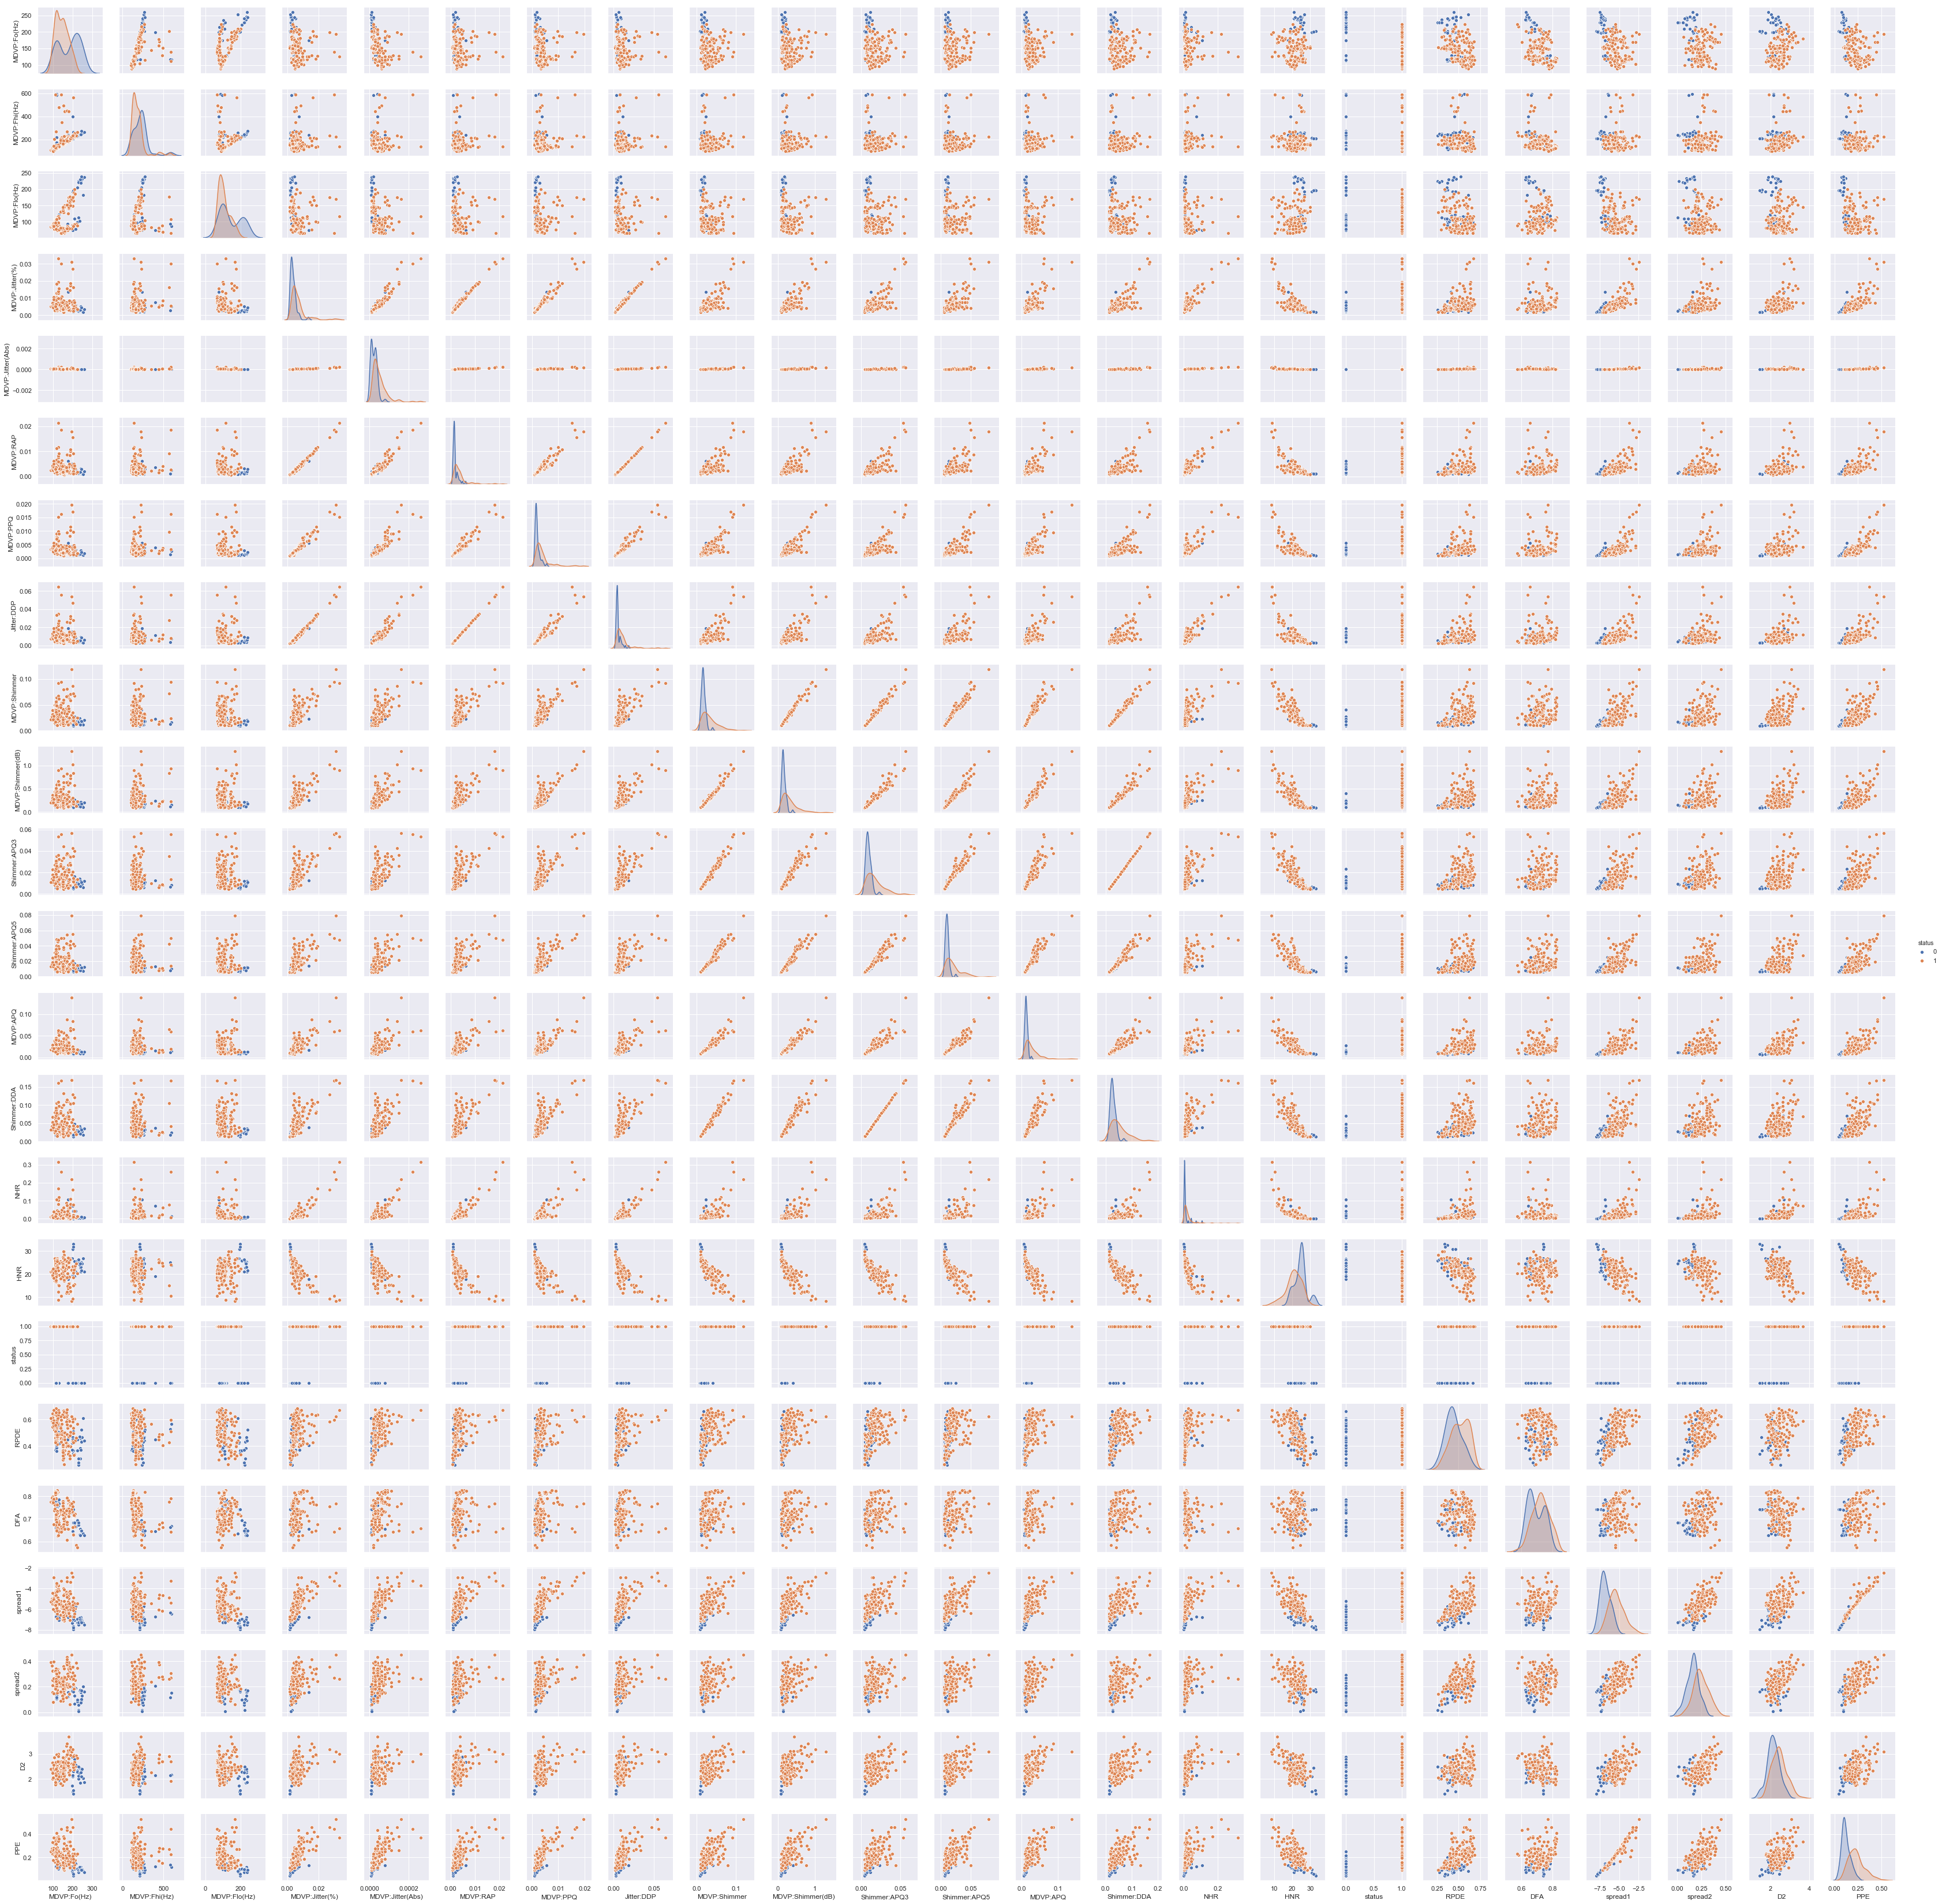

In [29]:
sns.set()
sns.pairplot(df, size = 2.0,hue ='status')
plt.show()

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


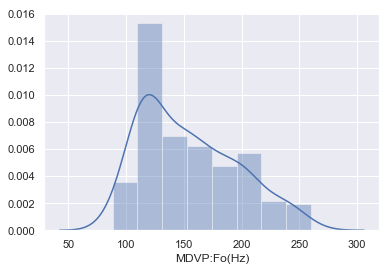

**********


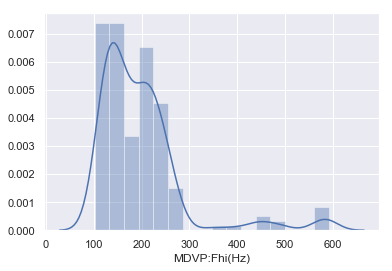

**********


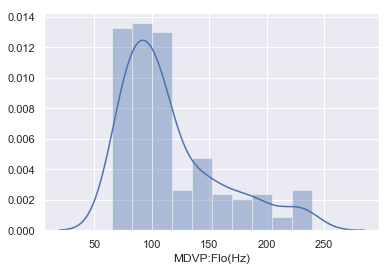

**********


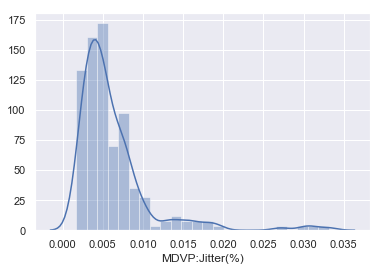

**********


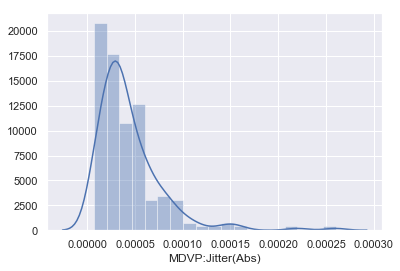

**********


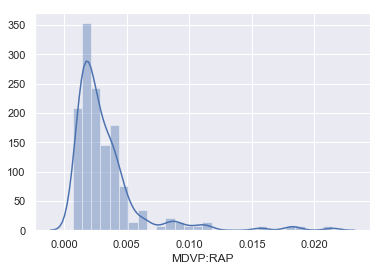

**********


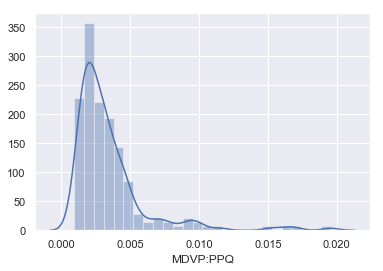

**********


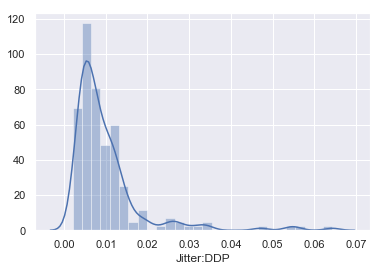

**********


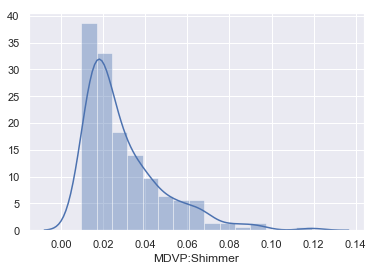

**********


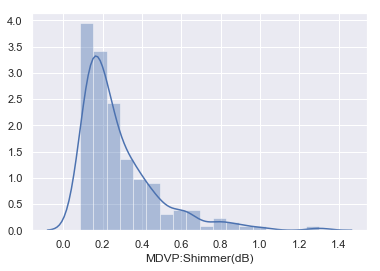

**********


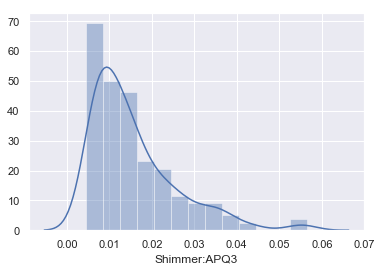

**********


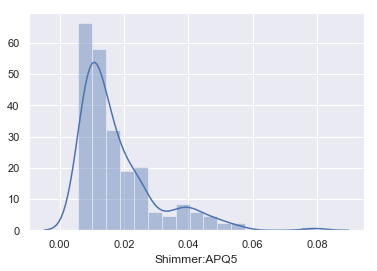

**********


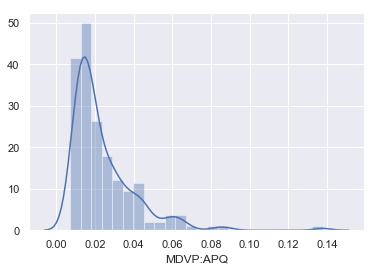

**********


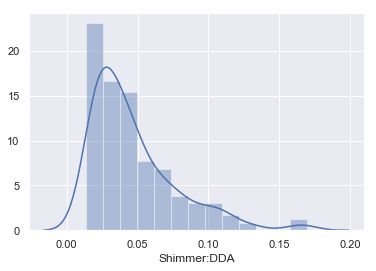

**********


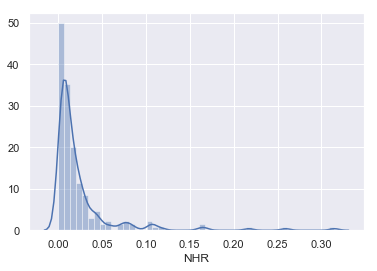

**********


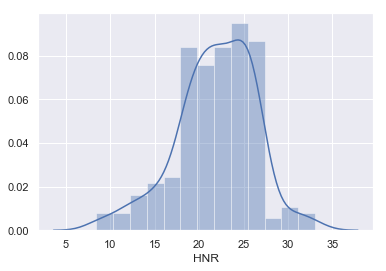

**********


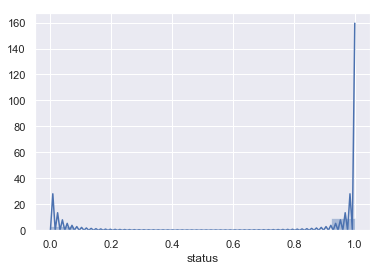

**********


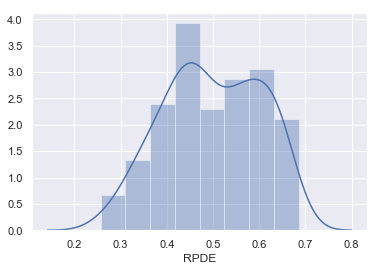

**********


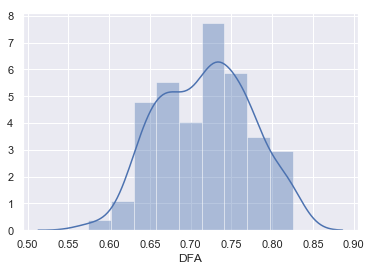

**********


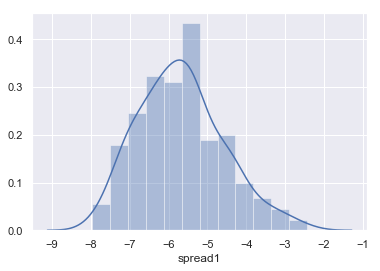

**********


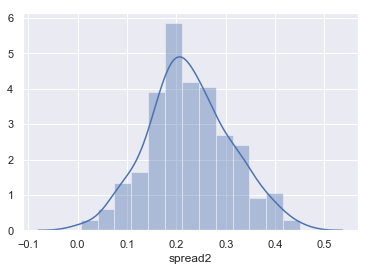

**********


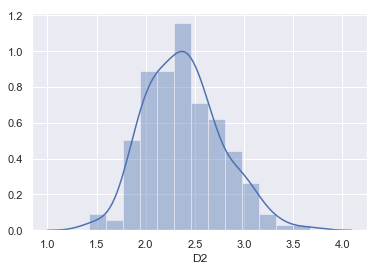

**********


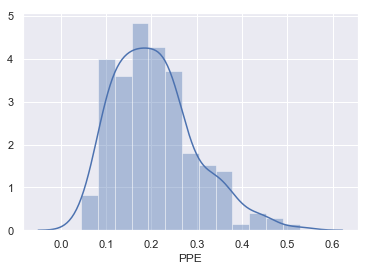

**********


In [36]:
colnames = df.columns
print(colnames)
colnames = colnames.drop('name')
for i in colnames:
    sns.distplot(df[i])
    plt.show()
    print('*'*10)

###### Based on the analysis most of the columns are right skewed like Shimmer APQ3,MDVP:Jitler,MDVP:Fhi,MDVP:Fo

###### Bivariate Analysis

In [128]:
# colnames = df.columns
# print(colnames)
# colnames = colnames.drop('name')
# colnames = colnames.drop('status')
# for j in colnames:
#     for i in colnames:
#         df.plot.scatter(x=i, y= j)
#         plt.show()
#         print('*'*10)


In [60]:
X= df.loc[:, df.columns != 'status']
y = df["status"]
X = X.drop('name', axis=1)  
# Spliting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100) 
      
print(X.head())
print(y.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)    ...     \
0   0.00370   0.00554     0.01109       0.04374             0.426    ...      
1   0.00465   0.00696     0.01394       0.06134             0.626    ...      
2   0.00544   0.00781     0.01633       0.05233             0.482    ...      
3   0.00502   0.00698     0.01505       0.05492             0.517    ...      
4   0.00655   0.00908     0.01966       0.06425             0.584    ...      

   MDVP:APQ  Shimmer:DDA      NHR     HNR   

In [61]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report


In [63]:
# Create Decision Tree classifer object using entropy
de_tree = DecisionTreeClassifier(criterion= 'entropy')

# Fit the classifier to train data
de_tree = de_tree.fit(X_train,y_train)

In [64]:
print("Score:",de_tree.score(X_test,y_test))

Score: 0.7457627118644068


In [65]:
# Predict the values?
y_pred = de_tree.predict(X_test) 
print("Predicted values:", y_pred) 

Predicted values: [1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1]


In [66]:
from sklearn.metrics import confusion_matrix    

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 

Confusion Matrix:  [[ 7  5]
 [10 37]]


In [67]:
print("Report : ",  classification_report(y_test, y_pred)) 

Report :               precision    recall  f1-score   support

          0       0.41      0.58      0.48        12
          1       0.88      0.79      0.83        47

avg / total       0.79      0.75      0.76        59



###### Bagging

In [69]:
from sklearn.ensemble import BaggingClassifier

bagcl = BaggingClassifier(base_estimator=de_tree, n_estimators=50)

#bgcl = BaggingClassifier(n_estimators=50)
bagcl = bagcl.fit(X_train, y_train)


In [72]:
y_predict = bagcl.predict(X_test)

print(bagcl.score(X_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))

0.864406779661017
[[ 7  5]
 [ 3 44]]


###### AdaBoosting

In [74]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(base_estimator=de_tree, n_estimators=10)
#abcl = AdaBoostClassifier( n_estimators=50)
adaboost = adaboost.fit(X_train, y_train)

In [75]:
y_predict = adaboost.predict(X_test)
print(adaboost.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7288135593220338
[[ 7  5]
 [11 36]]


###### GradientBoosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier(n_estimators = 50)
gradient = gradient.fit(X_train, y_train)

In [77]:
y_predict = gradient.predict(X_test)
print(gradient.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.8813559322033898
[[10  2]
 [ 5 42]]


In [92]:
pd.crosstab(y_predict,X_test.DFA, margins=True)

DFA,0.5827100000000001,0.623731,0.627337,0.628232,0.631653,0.646786,0.6538229999999999,0.657899,0.658245,0.6591319999999999,...,0.7787470000000001,0.787896,0.789532,0.79252,0.793509,0.807217,0.815908,0.817396,0.8195209999999999,All
row_0,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,15
1,1,1,1,0,0,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,44
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,59


In [93]:
pd.crosstab(y_predict,X_test.PPE, margins=True)

PPE,0.06850099999999999,0.073581,0.091546,0.093193,0.09632,0.097336,0.10851400000000001,0.11283800000000001,0.11573,0.119652,...,0.301952,0.316395,0.332086,0.367233,0.368674,0.378483,0.418646,0.45753299999999997,0.527367,All
row_0,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,44
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,59


In [94]:
pd.crosstab(y_predict,X_test.D2, margins=True)

D2,1.512275,1.765957,1.8212970000000002,1.831691,1.8620919999999999,1.8718709999999998,1.889002,1.91399,1.928708,1.929715,...,2.925862,2.958815,2.964568,3.0070959999999998,3.079221,3.274865,3.317586,3.413649,3.671155,All
row_0,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,1,1,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,44
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,59


In [95]:
pd.crosstab(y_predict,X_test.spread1, margins=True)

spread1,-7.682587,-7.496264,-7.314236999999999,-7.156076,-7.120925,-7.1115759999999995,-7.067931,-7.044105,-6.934474000000001,-6.816086,...,-4.379411,-4.239028,-4.0751919999999995,-3.7603480000000005,-3.4444779999999997,-3.377325,-3.297668,-2.929379,-2.434031,All
row_0,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,0,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,44
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,59


In [96]:
pd.crosstab(y_predict,X_test.spread2, margins=True)

spread2,0.006274,0.056844000000000006,0.063412,0.078202,0.08716499999999999,0.08784,0.120956,0.121952,0.127642,0.12795,...,0.33559,0.340256,0.363566,0.375531,0.389232,0.389295,0.396746,0.414758,0.45049300000000003,All
row_0,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,1,1,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,44
All,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,59


In [100]:

cl_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 2) 
  
    # Performing training 
cl_entropy.fit(X_train, y_train) 
cl_entropy 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [101]:

y_pred_new = cl_entropy.predict(X_test) 
print("Predicted values:") 
print(y_pred_new) 


Predicted values:
[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [102]:
print ("Accuracy of Entropy Model : ", accuracy_score(y_test,y_pred_new)*100,"%")  

Accuracy of Entropy Model :  86.4406779661017 %


###### Now we will try to include the minimum sample leaf as well

In [103]:

cl_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 2, min_samples_leaf = 3) 
  
    # Performing training 
cl_entropy.fit(X_train, y_train) 
cl_entropy 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [104]:

y_pred_new = cl_entropy.predict(X_test) 
print("Predicted values:") 
print(y_pred_new) 


Predicted values:
[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [105]:
print ("Accuracy of Entropy Model : ", accuracy_score(y_test,y_pred_new)*100,"%")  

Accuracy of Entropy Model :  86.4406779661017 %


C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scor

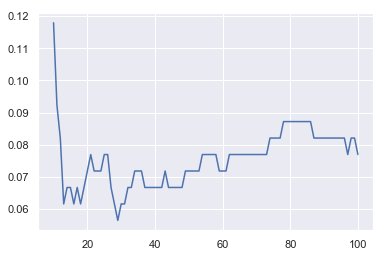

In [108]:
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
ensemble_clfs = [ ("RandomForestClassifier, max_features=None",RandomForestClassifier(warm_start=True, max_features=None, oob_score=True,))]
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 10
max_estimators = 100
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

In [124]:
randomforest = RandomForestClassifier(n_estimators = 30)
randomforest = randomforest.fit(X_train, y_train) 

In [125]:
# Predicting the test Set
y_predict = randomforest.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [126]:
print("Score:",randomforest.score(X_test,y_test))

Score: 0.847457627118644


In [127]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 

Confusion Matrix:  [[ 7  5]
 [10 37]]
